/home/chaaivisva/Chaaivisva/Projects/ML-Project/venv/lib/python3.12/site-packages/sklearn/cluster/_optics.py:1086: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


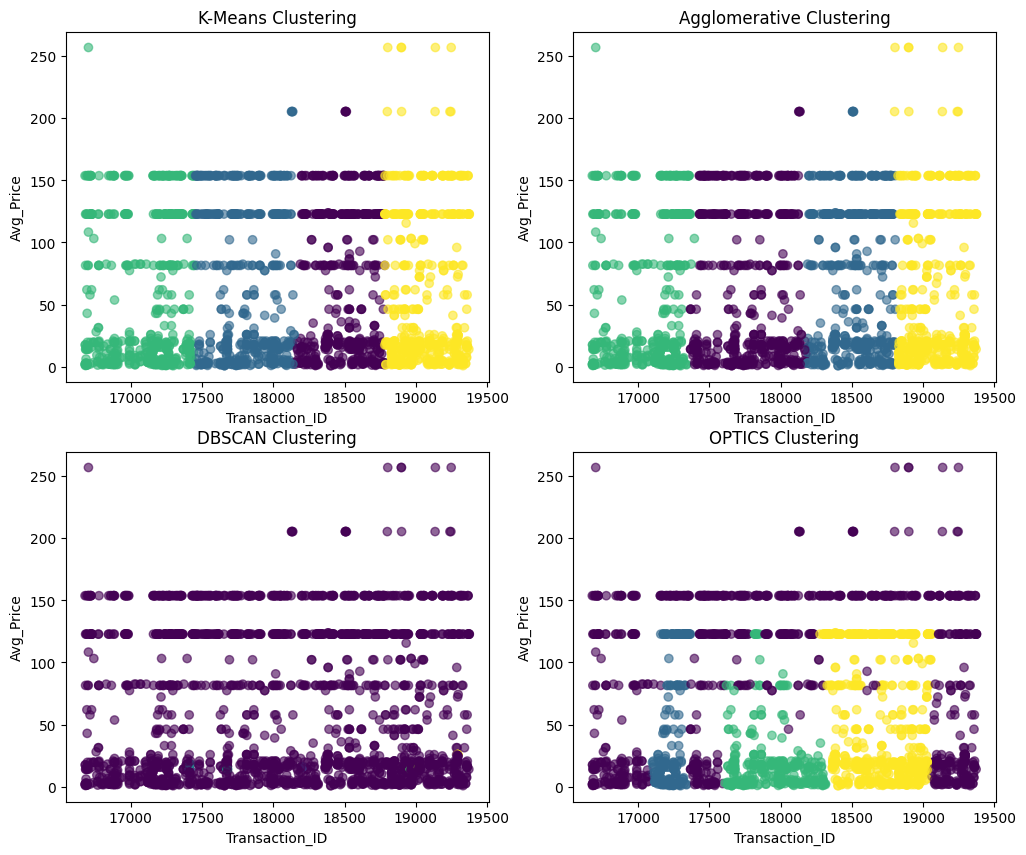

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, OPTICS

# Load Data
df = pd.read_csv('./updated.csv')

# Select features for clustering
x = df[["Transaction_ID", "Avg_Price"]]

# Encode categorical columns
for col in df.columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
df["kmeans_cluster"] = kmeans.fit_predict(x)

# Apply Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=4)
df["agglo_cluster"] = agglo.fit_predict(x)

# Apply DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
df["dbscan_cluster"] = dbscan.fit_predict(x)

# Apply OPTICS Clustering
optics = OPTICS(min_samples=5, xi=0.05, min_cluster_size=0.1)
df["optics_cluster"] = optics.fit_predict(x)

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
algorithms = [('K-Means', "kmeans_cluster"), ('Agglomerative', "agglo_cluster"), 
              ('DBSCAN', "dbscan_cluster"), ('OPTICS', "optics_cluster")]

for ax, (title, cluster_col) in zip(axes.flatten(), algorithms):
    ax.scatter(x["Transaction_ID"], x["Avg_Price"], c=df[cluster_col], cmap="viridis", alpha=0.6)
    ax.set_xlabel("Transaction_ID")
    ax.set_ylabel("Avg_Price")
    ax.set_title(f"{title} Clustering")

plt.show()